In [3]:
import torch, tomesd
from diffusers import StableDiffusionPipeline

/users/gmongaras/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-15 10:06:33.276455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-15 10:06:34.022081: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /users/gmongaras/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /users/gmongaras/cuda-11.8/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.0
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /users/gmongaras/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/users/gmongaras/miniconda3/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /hpc/mp/apps/conda did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)


In [4]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, cache_dir=".././cache")
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


In [5]:
# Reimport blocks
import importlib
import ToME as ToME
importlib.reload(ToME)
apply_patch = ToME.apply_patch

In [42]:
# Apply ToMe with a 50% merging ratio
apply_patch(pipe, ratio=0.5, merge_attn=True, merge_crossattn=False, merge_mlp=False) # Can also use pipe.unet in place of pipe here
pass

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 15.61it/s]


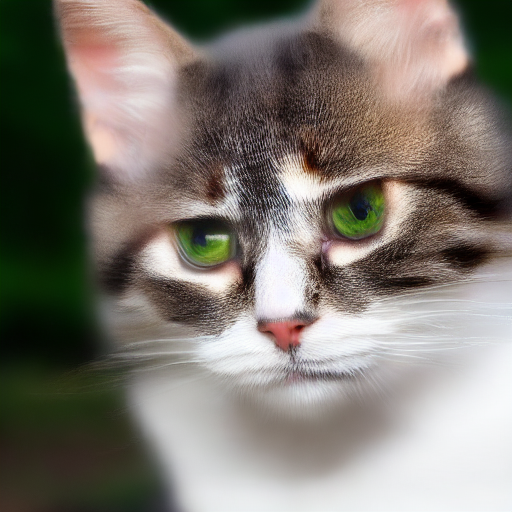

In [43]:
generator = torch.Generator(device="cuda").manual_seed(0)
image = pipe(
    ["A cat"]*1,
    negative_prompt=[""]*1,
    num_inference_steps=50,
    guidance_scale=7.5,
    height=512,
    width=512,
    generator=generator
).images[0]
image